In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import path

# Image Processor Class to load and display an image
(pixel values [0-2550])

dtype is uint8 for 8-bit images (0-255)

In [2]:
class ImageLoader():
    
    def _to_int(self, array):
        if array.dtype == np.float32:
            array = (array * 255).astype(np.uint8)
        if array.dtype == np.float64:
            array = (array * 255 * 255).astype(np.uint16)
        return array
    
    def load(self, path):
        img = mpimg.imread(path)
        print(f'Image Type: {type(img)}')
        print(f"Image dtype: {img.dtype}")
        print(f"Image nb bytes: {img.nbytes}")
        print(f"Image strides: {img.strides}")
        print(f"Image Shape: {img.shape}")
        print(f"Image Height: {img.shape[0]} | Width: {img.shape[1]}")
        print(f"Image Dimensions: {img.ndim}")
        print(f"Image Size: {img.size}")
        print(f"Max RGB Value: {img.max()}")
        print(f"Min RGB Value: {img.min()}")
        print(f"RGB values for pixel (100th rows, 50th column): {img[100, 50]}\n")
        return (img)

    def display(self, img):
        plt.imshow(img)
        plt.show()

images/Animals.jpg
Image Type: <class 'numpy.ndarray'>
Image dtype: uint8
Image nb bytes: 270000
Image strides: (900, 3, 1)
Image Shape: (300, 300, 3)
Image Height: 300 | Width: 300
Image Dimensions: 3
Image Size: 270000
Max RGB Value: 255
Min RGB Value: 0
RGB values for pixel (100th rows, 50th column): [79 54 47]



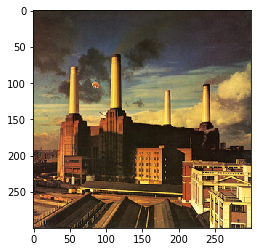

images/Div_Bell.jpg
Image Type: <class 'numpy.ndarray'>
Image dtype: uint8
Image nb bytes: 145200
Image strides: (660, 3, 1)
Image Shape: (220, 220, 3)
Image Height: 220 | Width: 220
Image Dimensions: 3
Image Size: 145200
Max RGB Value: 255
Min RGB Value: 0
RGB values for pixel (100th rows, 50th column): [184 198 185]



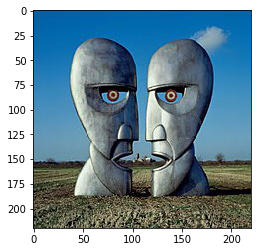

images/Atom_H_M.png
Image Type: <class 'numpy.ndarray'>
Image dtype: float32
Image nb bytes: 5760000
Image strides: (9600, 16, 4)
Image Shape: (600, 600, 4)
Image Height: 600 | Width: 600
Image Dimensions: 3
Image Size: 1440000
Max RGB Value: 1.0
Min RGB Value: 0.0
RGB values for pixel (100th rows, 50th column): [0.76862746 0.8980392  0.9529412  1.        ]



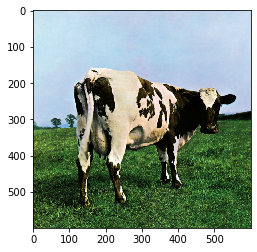

images/women.jpg
Image Type: <class 'numpy.ndarray'>
Image dtype: uint8
Image nb bytes: 18215295
Image strides: (9195, 3, 1)
Image Shape: (1981, 3065, 3)
Image Height: 1981 | Width: 3065
Image Dimensions: 3
Image Size: 18215295
Max RGB Value: 255
Min RGB Value: 0
RGB values for pixel (100th rows, 50th column): [109 106 101]



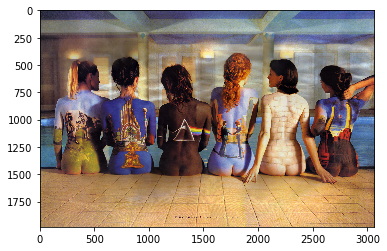

In [3]:
iml = ImageLoader()
directory = 'images'
for entry in os.scandir(directory):
    if (entry.path.endswith(".jpg")
            or entry.path.endswith(".png")) and entry.is_file():
        print(entry.path)
        arr = iml.load(entry.path)
        iml.display(arr)

# ScrapBooker class for basic image processing
- Crop, thin, juxtapose, create a mosaic, mask

In [4]:
class ScrapBooker():
    def crop(self, array, dimensions, position = (0, 0)):
        if (dimensions[0] > array.shape[0] or dimensions[1] > array.shape[1]):
            print (f"Error: Cannot crop with dimensions ({dimensions[0]} x {dimensions[1]}) bigger than the image ({array.shape[0]} x {array.shape[1]})")
            exit ()
        else:
            cropped_arr = array[position[0]: position[0] + dimensions[0],
                                position[1]: position[1] + dimensions[1]]
        return cropped_arr

    def thin(self, array, n, axis=0):
        if axis == 0:
            return array[:, :n]
        elif axis == 1:
            return array[:n, :]

    def juxtapose(self, array, n, axis=0):
        if axis == 0:
            return np.tile(array, (n, 1, 1))
        elif axis == 1:
            return np.tile(array, (1, n, 1))

    def mosaic(self, array, dimensions):
        return np.tile(array, dimensions)
    
    def masking(self, array):
        # seperate the row and column values
        total_row , total_col , layers = array.shape
        # create vector
        x , y = np.ogrid[:total_row , :total_col]
        # get the center values of the image        
        cen_x , cen_y = total_row/2 , total_col/2     
        # Measure distance value from center to each border pixel.      
        distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)
        # Select convenient radius value    
        radius = total_row/2
        circular_pic = distance_from_the_center > radius
        # Assign all the pixel value outside the circular disc to black.      
        array[circular_pic] =  0
        return array

    def put_mask(self, array):
        # seperate the row and column values
        total_row , total_col , layers = array.shape
        # create vector
        x , y = np.ogrid[:total_row , :total_col]
        # get the center values of the image        
        cen_x , cen_y = total_row/2 , total_col/2 
        circle_mask = (x-cen_x)**2 + (y-cen_y)**2 <= 200**2
        array[circle_mask] = [0,0,0]
        return array

Image Type: <class 'numpy.ndarray'>
Image dtype: uint8
Image nb bytes: 18215295
Image strides: (9195, 3, 1)
Image Shape: (1981, 3065, 3)
Image Height: 1981 | Width: 3065
Image Dimensions: 3
Image Size: 18215295
Max RGB Value: 255
Min RGB Value: 0
RGB values for pixel (100th rows, 50th column): [109 106 101]



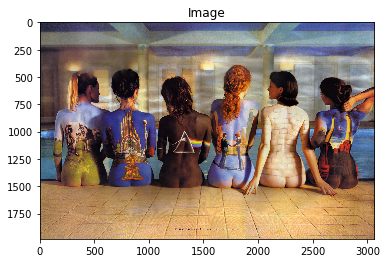

In [5]:
arr = iml.load("images/women.jpg")
plt.title('Image')
iml.display(arr)
SB = ScrapBooker()

## Testing:

In [6]:
start = time.time()
cropped_img = SB.crop(arr.copy(), (1800, 1500), (400, 2410))
end = time.time()
print(f"crop:\t\t\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
thin_img = SB.thin(arr.copy(), 1300, 1)
end = time.time()
print(f"thin:\t\t\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
jux_img = SB.juxtapose(arr.copy(), 3, 0)
end = time.time()
print(f"juxtapose (axis=0):\t[ exec-time = {end - start:.7f} ms ], img shape : {jux_img.shape}")

start = time.time()
jux_img2 = SB.juxtapose(arr.copy(), 4, 1)
end = time.time()
print(f"juxtapose (axis=1):\t[ exec-time = {end - start:.7f} ms ], img shape : {jux_img2.shape}")

start = time.time()
mos_img = SB.mosaic(arr.copy(), (3, 3, 1))
end = time.time()
print(f"mosaic :\t\t[ exec-time = {end - start:.7f} ms ], img shape : {mos_img.shape}")

start = time.time()
mask_around = SB.masking(arr.copy())
end = time.time()
print(f"masking around :\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
put_mask = SB.put_mask(arr.copy())
end = time.time()
print(f"put mask:\t\t[ exec-time = {end - start:.7f} ms ]")

crop:			[ exec-time = 0.0055900 ms ]
thin:			[ exec-time = 0.0062521 ms ]
juxtapose (axis=0):	[ exec-time = 0.0512934 ms ], img shape : (5943, 3065, 3)
juxtapose (axis=1):	[ exec-time = 0.1165421 ms ], img shape : (1981, 12260, 3)
mosaic :		[ exec-time = 0.6935370 ms ], img shape : (5943, 9195, 3)
masking around :	[ exec-time = 0.5707481 ms ]
put mask:		[ exec-time = 0.0747662 ms ]


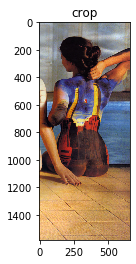

In [7]:
plt.title('crop')
iml.display(cropped_img)

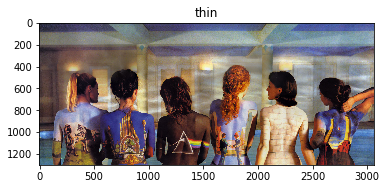

In [8]:
plt.title('thin')
iml.display(thin_img)

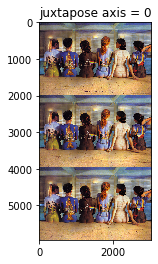

In [9]:
plt.imshow(jux_img)
plt.title('juxtapose axis = 0')
plt.show()

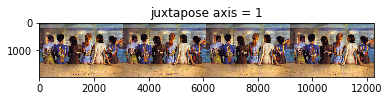

In [10]:
plt.imshow(jux_img2)
plt.title('juxtapose axis = 1')
plt.show()

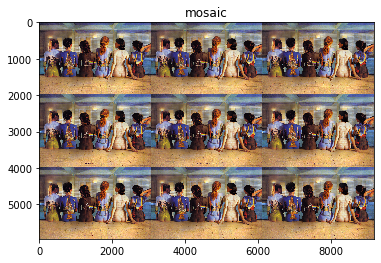

In [11]:
plt.title('mosaic')
iml.display(mos_img)

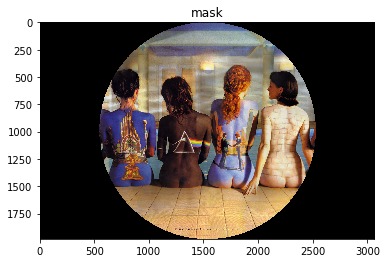

In [12]:
plt.title('mask')
iml.display(mask_around)

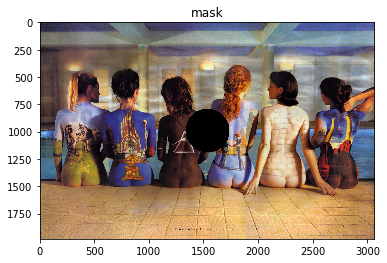

In [13]:
plt.title('mask')
iml.display(put_mask)

# Color filter class

Image Type: <class 'numpy.ndarray'>
Image dtype: uint8
Image nb bytes: 145200
Image strides: (660, 3, 1)
Image Shape: (220, 220, 3)
Image Height: 220 | Width: 220
Image Dimensions: 3
Image Size: 145200
Max RGB Value: 255
Min RGB Value: 0
RGB values for pixel (100th rows, 50th column): [184 198 185]



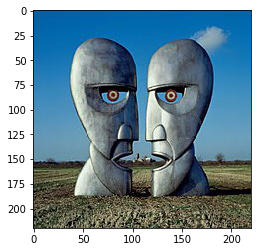

In [14]:
arr = iml.load("images/Div_Bell.jpg")
arr = iml._to_int(arr)
iml.display(arr)

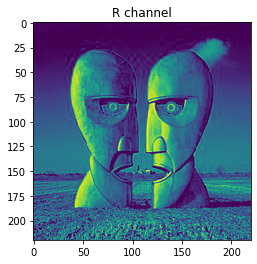

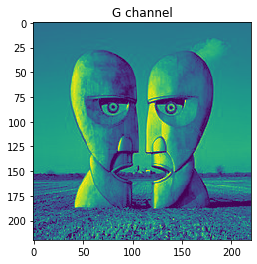

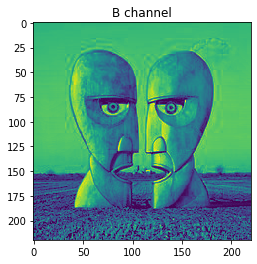

In [15]:
# View Each Channel
plt.title('R channel')
plt.imshow(arr[ : , : , 0])
plt.show()

plt.title('G channel')
plt.imshow(arr[ : , : , 1])
plt.show()

plt.title('B channel')
plt.imshow(arr[ : , : , 2])
plt.show()

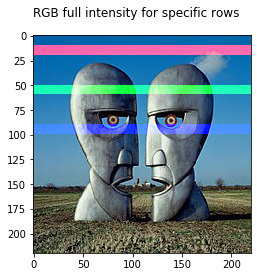

In [16]:
# Values to full intensity for following rows:
plt.suptitle('RGB full intensity for specific rows')
arr_r = arr.copy()
arr_r[10:20 , : , 0] = 255 #  R channel
arr_r[50:60 , : , 1] = 255 #  G channel
arr_r[90:100 , : , 2] = 255 #  B channel
iml.display(arr_r)

In [17]:
class ColorFilter():
    def invert(self, array):
        #  to invert the color : subtract the pixel's color values from the maximum, 255 (8-bit number).
        return (255 - array[:, :, :3])

    def to_blue(self, array):
        # create zero matrix
        split_img = np.zeros(array.shape, dtype="uint8")
        # assign blue channel
        split_img[:, :, 2] = array[:, :, 2]
        if split_img.shape[-1] == 4:
            split_img[:, :, 3] = array[:, :, 3]
        return split_img

    def to_green(self, array):
        # using only * operator :
        # assign blue & red channel to 0
        array[:, :, [0, 2]] = array[:, :, [0, 2]] * 0
        return array

    def to_red(self, array):
        # using to to_green and to_blue :
        green = self.to_green(np.copy(array[:, :, :3]))
        blue = self.to_blue(np.copy(array[:, :, :3]))
        array[:, :, :3] = array[:, :, :3] - green - blue
        return array

    def primary(self, array):
        # 255/2 = 127 
        array[(array > 127)] = 255
        array[(array <= 127)] = 0
        return array

    def color_reduction(self, array):
        # Cut off the remainder of the division using // and multiply again, 
        # the pixel values become discrete values and the number of colors can be reduced
        array_32 = array // 32 * 32
        #array_128 = array // 128 * 128
        return array_32
    
    def celluloid(self, array, thresh=4):
        thresholds = np.linspace(0, 255, num=thresh + 1, dtype="uint8")
        # thresh + 1 to have 4 blocks of thresholds
        for i in np.arange(thresh):
            array[(array >= thresholds[i]) & (array < thresholds[i+1])] = thresholds[i]
            array[(array >= thresholds[-2])] = thresholds[-1]
        return array


    def to_grayscale(self, array, filter='w'):
        assert filter in ["w", "weighted"] or filter in [
            "m", "mean"], "invalid filter"
        if filter in ['m', 'mean']:
            mean_reduce_2d = (np.sum(array[:, :, :3], axis=2) / 3).astype(int)
            mean = mean_reduce_2d[:, :, np.newaxis] # shape(rows, cols, 1)
            mean = np.broadcast_to(mean, (*mean.shape[:-1], 3))
            return mean
        elif filter in ['w', 'weighted']:
            avg = np.dot(array[:, :, :3], [0.299, 0.587, 0.114]).astype(int)
            avg = avg.reshape(*avg.shape, 1)
            avg = np.tile(avg, (1, 3))
            return (avg)

    def to_grayscale2(self, array, filter='w'):
        # Using only sum
        assert filter in ["w", "weighted"] or filter in [
            "m", "mean"], "invalid filter"
        if filter in ['m', 'mean']:
            mean = (np.sum(array[:, :, :3], axis=2, keepdims=True) / 3).astype(int)
            array[:, :, :3] = mean
            return array
        elif filter in ['w', 'weighted']:
            weighted = (np.sum((array[:, :, :3] * [0.299, 0.587, 0.114]), axis=2, keepdims=True)).astype(int)
            array[:, :, :3] = weighted
            return array
        
    def to_grayscale3(self, array, filter='w'):
        assert filter in ["w", "weighted"] or filter in [
            "m", "mean"], "invalid filter"
        if filter in ['m', 'mean']:
            gray = np.mean(array[:, :, :3], axis=2, keepdims=True).astype(int)
            gray = np.broadcast_to(gray, (*gray.shape[:-1], 3))
        elif filter in ['w', 'weighted']: 
            gray = (np.sum((array[..., :3] * [0.299, 0.587, 0.114]), axis=2, keepdims=True)).astype(int)
            gray = np.tile(gray, (1, 3))
        return (gray)

In [18]:
CF = ColorFilter()

In [19]:
## start = time.time()
invert = CF.invert(arr.copy())
end = time.time()
print(f"invert:\t\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
blue = CF.to_blue(arr.copy())
end = time.time()
print(f"to_blue:\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
green = CF.to_green(arr.copy())
end = time.time()
print(f"to_green:\t[ exec-time = {end - start:.7f} ms ]")

arr4 = arr.copy()
start = time.time()
red = CF.to_red(arr.copy())
end = time.time()
print(f"to_red:\t\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
primary = CF.primary(arr.copy())
end = time.time()
print(f"primary:\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
col_reduc = CF.color_reduction(arr.copy())
end = time.time()
print(f"col_reduc:\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
cell = CF.celluloid(arr.copy(), 5)
end = time.time()
print(f"cell shade:\t[ exec-time = {end - start:.7f} ms ]")

invert:		[ exec-time = 22.4522991 ms ]
to_blue:	[ exec-time = 0.0004599 ms ]
to_green:	[ exec-time = 0.0014160 ms ]
to_red:		[ exec-time = 0.0016301 ms ]
primary:	[ exec-time = 0.0025258 ms ]
col_reduc:	[ exec-time = 0.0022619 ms ]
cell shade:	[ exec-time = 0.0039341 ms ]


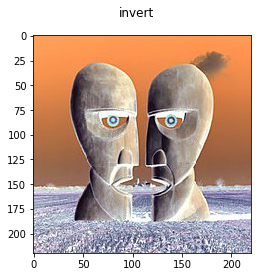

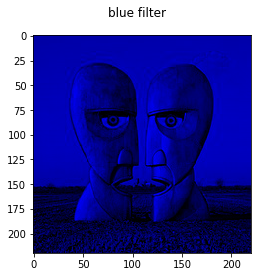

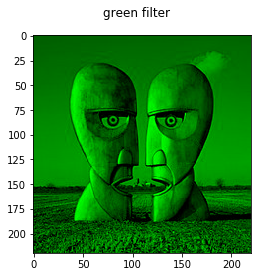

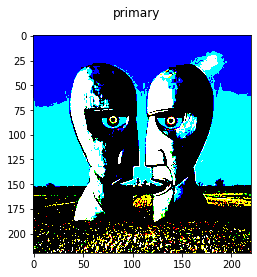

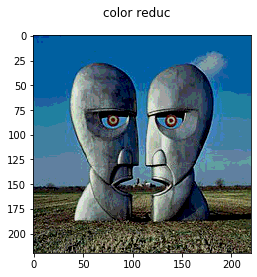

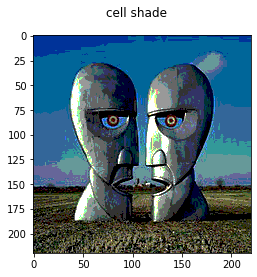

In [20]:
plt.suptitle('invert')
iml.display(invert)

plt.suptitle('blue filter')
iml.display(blue)

plt.suptitle('green filter')
iml.display(green)

plt.suptitle('primary')
iml.display(primary)

plt.suptitle('color reduc')
iml.display(col_reduc)

plt.suptitle('cell shade')
iml.display(cell)

In [21]:
start = time.time()
gray_m = CF.to_grayscale(arr.copy(), 'm')
end = time.time()
print(f"to_grayscale(m):\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
gray_w = CF.to_grayscale(arr.copy())
end = time.time()
print(f"to_grayscale(w):\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
gray_m2 = CF.to_grayscale2(arr.copy(), 'm')
end = time.time()
print(f"to_grayscale2(m):\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
gray_w2 = CF.to_grayscale2(arr.copy())
end = time.time()
print(f"to_grayscale2(w):\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
gray_m3 = CF.to_grayscale3(arr.copy(), 'm')
end = time.time()
print(f"to_grayscale3(m):\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
gray_w3 = CF.to_grayscale3(arr.copy())
end = time.time()
print(f"to_grayscale3(w):\t[ exec-time = {end - start:.7f} ms ]")

to_grayscale(m):	[ exec-time = 0.0104549 ms ]
to_grayscale(w):	[ exec-time = 0.0088909 ms ]
to_grayscale2(m):	[ exec-time = 0.0028760 ms ]
to_grayscale2(w):	[ exec-time = 0.0065548 ms ]
to_grayscale3(m):	[ exec-time = 0.0043130 ms ]
to_grayscale3(w):	[ exec-time = 0.0048988 ms ]


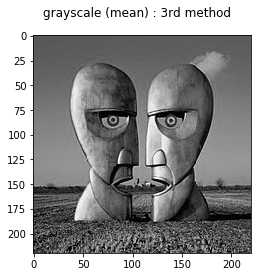

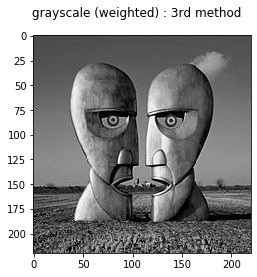

In [22]:
plt.suptitle('grayscale (mean) : 3rd method')
iml.display(gray_m3)
plt.suptitle('grayscale (weighted) : 3rd method')
iml.display(gray_w3)

In [23]:
from numpy.lib import stride_tricks
import cv2

## Mean Blurr and Gaussian Blurr

### Kernel convolution


In [24]:
class AdvancedFilter:
    
    def mean_blur(self, array, size):
        """This method receives an image and performs a mean blur on it. 
        In a mean blur, each pixel becomes the average of its neighboring pixels."""
        
        new_img = np.zeros(array.shape, dtype="uint8")
        kn_border = int((size - 1) / 2)
        for row in np.arange(kn_border, array.shape[0] - kn_border):
            for col in np.arange(kn_border, array.shape[1] - kn_border):
                for m in np.arange(0, array.shape[2]):
                    new_img[row, col, m] = array[row-kn_border:row+kn_border+1, col-kn_border:col+kn_border+1, m].mean()
        return (new_img)
    
    def vec_mean_blur(self, array, kernel_size):
        """Vectorized version of the above method which receives an image and performs a mean blur on it."""
        
        row, col = array.shape[0] - kernel_size + 1, array.shape[1] - kernel_size + 1
        new_shape = (row, col, array.shape[2])
        patches_shape = row, col, kernel_size, kernel_size
        new_img = np.zeros(new_shape, dtype="uint8")
        strides = 2 * array.strides[:2]
        for m in np.arange(array.shape[2]):
            patches = stride_tricks.as_strided(array[:, :, m], shape=patches_shape, strides=strides)
            strided_means = patches.mean(axis=(-1, -2))
            new_img[:, :, m] = strided_means
        return new_img

In [25]:
AF = AdvancedFilter()

In [26]:
start = time.time()
mean_b = AF.mean_blur(arr.copy(), 5)
end = time.time()
print(f"mean blur:\t\t[ exec-time = {end - start:.7f} ms ]")

start = time.time()
vec_mean_b = AF.vec_mean_blur(arr.copy(), 5)
end = time.time()
print(f"vectorize mean blur :\t[ exec-time = {end - start:.7f} ms ]")

img = cv2.imread('images/Div_Bell.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
start = time.time()
cv2blur = cv2.blur(RGB_img,(5,5))
end = time.time()
print(f"cv2 blurr:\t\t[ exec-time = {end - start:.7f} ms ]")

mean blur:		[ exec-time = 2.8943543 ms ]
vectorize mean blur :	[ exec-time = 0.0200362 ms ]
cv2 blurr:		[ exec-time = 0.0095501 ms ]


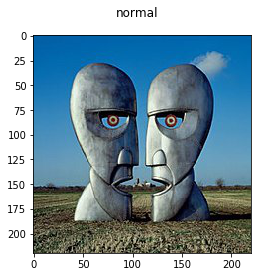

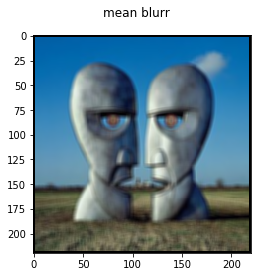

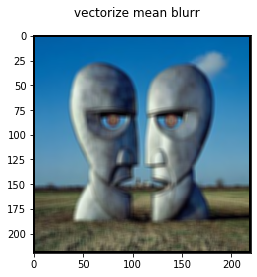

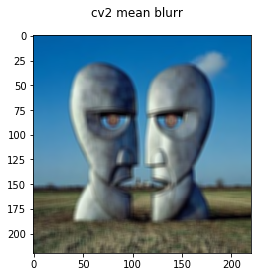

In [27]:
plt.suptitle('normal')
iml.display(arr)

plt.suptitle('mean blurr')
iml.display(mean_b)

plt.suptitle('vectorize mean blurr')
iml.display(mean_b)

plt.suptitle('cv2 mean blurr')
iml.display(cv2blur)